<table class="ee-notebook-buttons" align="left">
    <td><a target="_blank"  href="https://github.com/giswqs/earthengine-py-documentation/tree/master/Template/template.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td>
    <td><a target="_blank"  href="https://nbviewer.jupyter.org/github/giswqs/earthengine-py-documentation/blob/master/Template/template.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
    <td><a target="_blank"  href="https://mybinder.org/v2/gh/giswqs/earthengine-py-documentation/master?filepath=Template/template.ipynb"><img width=58px src="https://mybinder.org/static/images/logo_social.png" />Run in binder</a></td>
    <td><a target="_blank"  href="https://colab.research.google.com/github/giswqs/earthengine-py-documentation/blob/master/Template/template.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# U.S. Census Data 

The United States Census Bureau Topologically Integrated Geographic Encoding and Referencing (TIGER) dataset contains the 2018 boundaries for the primary governmental divisions of the United States. In addition to the fifty states, the Census Bureau treats the District of Columbia, Puerto Rico, and each of the island areas (American Samoa, the Commonwealth of the Northern Mariana Islands, Guam, and the U.S. Virgin Islands) as the statistical equivalents of States for the purpose of data presentation. Each feature represents a state or state equivalent.

For full technical details on all TIGER 2018 products, see the [TIGER technical documentation](https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2018/TGRSHP2018_TechDoc.pdf).

* [TIGER: US Census States](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2018_States): `ee.FeatureCollection("TIGER/2018/States")`
* [TIGER: US Census Counties](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2018_Counties): `ee.FeatureCollection("TIGER/2018/Counties")`
* [TIGER: US Census Tracts](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_Tracts_DP1): `ee.FeatureCollection("TIGER/2010/Tracts_DP1")`
* [TIGER: US Census Blocks](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_Blocks): `ee.FeatureCollection("TIGER/2010/Blocks")`
* [TIGER: US Census Roads](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2016_Roads): `ee.FeatureCollection("TIGER/2016/Roads")`
* [TIGER: US Census 5-digit ZIP Code](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_ZCTA5): `ee.FeatureCollection("TIGER/2010/ZCTA5")`

## Install Earth Engine API
Install the [Earth Engine Python API](https://developers.google.com/earth-engine/python_install) and [geehydro](https://github.com/giswqs/geehydro). The **geehydro** Python package builds on the [folium](https://github.com/python-visualization/folium) package and implements several methods for displaying Earth Engine data layers, such as `Map.addLayer()`, `Map.setCenter()`, `Map.centerObject()`, and `Map.setOptions()`.
The following script checks if the geehydro package has been installed. If not, it will install geehydro, which automatically install its dependencies, including earthengine-api and folium.

In [1]:
import subprocess

try:
    import geehydro
except ImportError:
    print('geehydro package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geehydro'])

# Import libraries    
import ee
import folium
import geehydro

# Authenticate and initialize Earth Engine API
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

## TIGER: US Census States

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2018_States

![](https://i.imgur.com/DAESBK4.png)

### Displaying data

In [2]:
Map = folium.Map(location=[40, -100], zoom_start=4)


states = ee.FeatureCollection('TIGER/2018/States')

Map.centerObject(states, 4)
Map.addLayer(states, {}, 'US States')

Map.addLayerControl()
Map

### Dispalying vector as raster

In [3]:
Map = folium.Map(location=[40, -100], zoom_start=4)


states = ee.FeatureCollection('TIGER/2018/States')
image = ee.Image().paint(states, 0, 2)

Map.centerObject(states, 4)
Map.addLayer(image, {}, 'US States')

Map.setControlVisibility()
Map

### Select by attribute

#### Select one single state

In [4]:
Map = folium.Map(location=[40, -100], zoom_start=4)


tn = ee.FeatureCollection('TIGER/2018/States') \
    .filter(ee.Filter.eq("NAME", 'Tennessee')) 

Map.centerObject(tn, 6)
Map.addLayer(tn, {}, 'Tennessee')

Map.setControlVisibility()
Map

In [5]:
tn = ee.FeatureCollection('TIGER/2018/States') \
    .filter(ee.Filter.eq("NAME", 'Tennessee')) \
    .first()

props = tn.toDictionary().getInfo()
print(props)

{'ALAND': 106802728188, 'AWATER': 2350123465, 'DIVISION': '6', 'FUNCSTAT': 'A', 'GEOID': '47', 'INTPTLAT': '+35.8608030', 'INTPTLON': '-086.3499896', 'LSAD': '00', 'MTFCC': 'G4000', 'NAME': 'Tennessee', 'REGION': '3', 'STATEFP': '47', 'STATENS': '01325873', 'STUSPS': 'TN'}


#### Select multiple states

In [6]:
Map = folium.Map(location=[40, -100], zoom_start=4)


selected = ee.FeatureCollection('TIGER/2018/States') \
    .filter(ee.Filter.inList("NAME", ['Tennessee', 'Alabama', 'Georgia']))

Map.centerObject(selected, 6)
Map.addLayer(selected, {}, 'Selected states')

Map.setControlVisibility()
Map

#### Printing all values of a column

In [7]:
states = ee.FeatureCollection('TIGER/2018/States').sort('ALAND', False)
names = states.aggregate_array("STUSPS").getInfo()
print(names)

['AK', 'TX', 'CA', 'MT', 'NM', 'AZ', 'NV', 'CO', 'WY', 'OR', 'ID', 'UT', 'KS', 'MN', 'NE', 'SD', 'ND', 'MO', 'OK', 'WA', 'GA', 'MI', 'IA', 'IL', 'WI', 'FL', 'AR', 'AL', 'NC', 'NY', 'MS', 'PA', 'LA', 'TN', 'OH', 'KY', 'VA', 'IN', 'ME', 'SC', 'WV', 'MD', 'VT', 'NH', 'MA', 'NJ', 'HI', 'CT', 'PR', 'DE', 'RI', 'GU', 'MP', 'VI', 'AS', 'DC']


In [8]:
areas = states.aggregate_array("ALAND").getInfo()
print(areas)

[1478839695958, 676653171537, 403503931312, 376962738765, 314196306401, 294198551143, 284329506470, 268422891711, 251458544898, 248606993270, 214049787659, 212886221680, 211755344060, 206228939448, 198956658395, 196346981786, 178707534813, 178050802184, 177662925723, 172112588220, 149482048342, 146600952990, 144661267977, 143780567633, 140290039723, 138949136250, 134768872727, 131174048583, 125923656064, 122049149763, 121533519481, 115884442321, 111897594374, 106802728188, 105828882568, 102279490672, 102257717110, 92789302676, 79887426037, 77864918488, 62266474513, 25151100280, 23874175944, 23189413166, 20205125364, 19047825980, 16633990195, 12542497068, 8868896030, 5045925646, 2677779902, 543555840, 472292529, 348021896, 197759063, 158340391]


In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


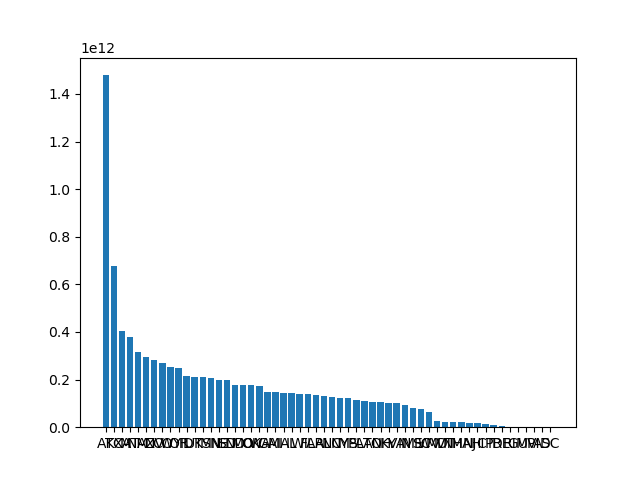

In [10]:
plt.bar(names, areas)
plt.show()

#### Discriptive statistics of a column

For example, we can calcualte the total land area of all states:

In [11]:
states = ee.FeatureCollection('TIGER/2018/States')
area_m2 = states.aggregate_sum("ALAND").getInfo()
area_km2 = area_m2 / 1000000
print("Total land area: ", area_km2, " km2")

Total land area:  9159859.051207  km2


In [12]:
states = ee.FeatureCollection('TIGER/2018/States')
stats = states.aggregate_stats("ALAND").getInfo()
print(stats)

{'type': 'DataDictionary', 'values': {'max': 1478839695958, 'mean': 163568911628.69644, 'min': 158340391, 'sample_sd': 217378106661.36972, 'sample_var': 4.7253241255681835e+22, 'sum': 9159859051207, 'sum_sq': 4.0971964447406937e+24, 'total_count': 56, 'total_sd': 215428487847.16492, 'total_var': 4.640943337611609e+22, 'valid_count': 56, 'weight_sum': 56, 'weighted_sum': 9159859051207}}


#### Add a new column to the attribute table

In [13]:
states = ee.FeatureCollection('TIGER/2018/States').sort('ALAND', False)
states = states.map(lambda x: x.set('AreaKm2', x.area().divide(1000000).toLong()))
first = states.first().toDictionary().getInfo()
print(first)

{'ALAND': 1478839695958, 'AWATER': 245481577452, 'AreaKm2': 1713742, 'DIVISION': '9', 'FUNCSTAT': 'A', 'GEOID': '02', 'INTPTLAT': '+63.3473560', 'INTPTLON': '-152.8397334', 'LSAD': '00', 'MTFCC': 'G4000', 'NAME': 'Alaska', 'REGION': '4', 'STATEFP': '02', 'STATENS': '01785533', 'STUSPS': 'AK'}


#### Set symbology based on column  values

In [14]:
Map = folium.Map(location=[40, -100], zoom_start=4)


states = ee.FeatureCollection('TIGER/2018/States')

visParams = {
  'palette': ['purple', 'blue', 'green', 'yellow', 'orange', 'red'],
  'min': 500000000.0,
  'max': 5e+11,
  'opacity': 0.8,
}

image = ee.Image().float().paint(states, 'ALAND')
Map.addLayer(image, visParams, 'TIGER/2018/States')

Map.setControlVisibility()
Map

#### Download attribute table as a CSV

In [15]:
states = ee.FeatureCollection('TIGER/2018/States')
url = states.getDownloadURL(filetype="csv", selectors=['NAME', 'ALAND', 'REGION', 'STATEFP', 'STUSPS'], filename="states")
print(url)

https://earthengine.googleapis.com/api/table?docid=ef4235567e902c610dca7311b260bf49&token=bde318b4124c28479fa5475720c8110d


#### Formatting the output

In [16]:
first = states.first()
props = first.propertyNames().getInfo()
print(props)
props = states.first().toDictionary(props).getInfo()
print(props)

for key, value in props.items():
    print("{}: {}".format(key, value))

['STATENS', 'GEOID', 'AWATER', 'LSAD', 'STUSPS', 'STATEFP', 'FUNCSTAT', 'INTPTLAT', 'DIVISION', 'REGION', 'NAME', 'INTPTLON', 'MTFCC', 'ALAND', 'system:index']
{'ALAND': 348021896, 'AWATER': 1550236201, 'DIVISION': '0', 'FUNCSTAT': 'A', 'GEOID': '78', 'INTPTLAT': '+18.3267480', 'INTPTLON': '-064.9712508', 'LSAD': '00', 'MTFCC': 'G4000', 'NAME': 'United States Virgin Islands', 'REGION': '9', 'STATEFP': '78', 'STATENS': '01802710', 'STUSPS': 'VI', 'system:index': '00000000000000000022'}
ALAND: 348021896
AWATER: 1550236201
DIVISION: 0
FUNCSTAT: A
GEOID: 78
INTPTLAT: +18.3267480
INTPTLON: -064.9712508
LSAD: 00
MTFCC: G4000
NAME: United States Virgin Islands
REGION: 9
STATEFP: 78
STATENS: 01802710
STUSPS: VI
system:index: 00000000000000000022


#### Download data as shapefile to Google Drive

In [17]:
# function for converting GeometryCollection to Polygon/MultiPolygon
def filter_polygons(ftr):
    geometries = ftr.geometry().geometries()
    geometries = geometries.map(lambda geo: ee.Feature( ee.Geometry(geo)).set('geoType',  ee.Geometry(geo).type()))

    polygons = ee.FeatureCollection(geometries).filter(ee.Filter.eq('geoType', 'Polygon')).geometry()
    return ee.Feature(polygons).copyProperties(ftr)

states = ee.FeatureCollection('TIGER/2018/States')
new_states = states.map(filter_polygons)

col_names = states.first().propertyNames().getInfo()
print("Column names: ", col_names)

url = new_states.getDownloadURL("shp", col_names, 'states');
print(url)

desc = 'states'

# Set configration parameters for output vector
task_config = {
    'folder': 'gee-data', # output Google Drive folder
    'fileFormat': 'SHP',  
    'selectors': col_names # a list of properties/attributes to be exported
    }

print('Exporting {}'.format(desc))
task = ee.batch.Export.table.toDrive(new_states, desc, **task_config)
task.start()

Column names:  ['STATENS', 'GEOID', 'AWATER', 'LSAD', 'STUSPS', 'STATEFP', 'FUNCSTAT', 'INTPTLAT', 'DIVISION', 'REGION', 'NAME', 'INTPTLON', 'MTFCC', 'ALAND', 'system:index']
https://earthengine.googleapis.com/api/table?docid=7bfd15923391ce788ddeadc85d7fd70f&token=ce51145f15f6bb349ab01380c1cfb3ca
Exporting states


## TIGER: US Census Blocks

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_Blocks

![](https://i.imgur.com/KTQqb8v.png)

In [18]:
Map = folium.Map(location=[40, -100], zoom_start=4)


dataset = ee.FeatureCollection('TIGER/2010/Blocks') \
    .filter(ee.Filter.eq('statefp10', '47'))
    
pop = dataset.aggregate_sum('pop10')
    
print("The number of census blocks: ", dataset.size().getInfo())
print("Total population: ", pop.getInfo())
    
Map.setCenter(-86.79, 35.87, 6)   
Map.addLayer(dataset, {}, "Census Block", False)
    
visParams = {
  'min': 0.0,
  'max': 700.0,
  'palette': ['black', 'brown', 'yellow', 'orange', 'red']
}

image = ee.Image().float().paint(dataset, 'pop10')

Map.setCenter(-73.99172, 40.74101, 13)
Map.addLayer(image, visParams, 'TIGER/2010/Blocks')

Map.setControlVisibility()
Map

The number of census blocks:  240116
Total population:  6346105


## TIGER: US Census Counties 2018

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2018_Counties

![](https://i.imgur.com/K3j99eA.png)

In [19]:
Map = folium.Map(location=[40, -100], zoom_start=4)


Map.setCenter(-110, 40, 5)
states = ee.FeatureCollection('TIGER/2018/States') 
#     .filter(ee.Filter.eq('STUSPS', 'TN'))
# // Turn the strings into numbers
states = states.map(lambda f: f.set('STATEFP', ee.Number.parse(f.get('STATEFP'))))

state_image = ee.Image().float().paint(states, 'STATEFP')

visParams = {
  'palette': ['purple', 'blue', 'green', 'yellow', 'orange', 'red'],
  'min': 0,
  'max': 50,
  'opacity': 0.8,
};

counties = ee.FeatureCollection('TIGER/2016/Counties')  
# print(counties.first().propertyNames().getInfo())

image = ee.Image().paint(states, 0, 2)
# Map.setCenter(-99.844, 37.649, 4)
# Map.addLayer(image, {'palette': 'FF0000'}, 'TIGER/2018/States')
Map.addLayer(state_image, visParams, 'TIGER/2016/States');
Map.addLayer(ee.Image().paint(counties, 0, 1), {}, 'TIGER/2016/Counties')

Map.addLayerControl()
Map

## TIGER: US Census Tracts

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_Tracts_DP1

http://magic.lib.uconn.edu/magic_2/vector/37800/demogprofilehousect_37800_0000_2010_s100_census_1_t.htm

![](https://i.imgur.com/WV2XA9b.png)

In [20]:
Map = folium.Map(location=[40, -100], zoom_start=4)


dataset = ee.FeatureCollection('TIGER/2010/Tracts_DP1')
visParams = {
  'min': 0,
  'max': 4000,
  'opacity': 0.8,
   'palette': ['#ece7f2', '#d0d1e6', '#a6bddb', '#74a9cf', '#3690c0', '#0570b0', '#045a8d', '#023858']
}

# print(dataset.first().propertyNames().getInfo())

# Turn the strings into numbers
dataset = dataset.map(lambda f: f.set('shape_area', ee.Number.parse(f.get('dp0010001'))))

# Map.setCenter(-103.882, 43.036, 8)
image = ee.Image().float().paint(dataset, 'dp0010001')

Map.addLayer(image, visParams, 'TIGER/2010/Tracts_DP1')

Map.addLayerControl()
Map

## TIGER: US Census Roads

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2016_Roads

![](https://i.imgur.com/mguD0IQ.png)

In [21]:
Map = folium.Map(location=[40, -100], zoom_start=4)


fc = ee.FeatureCollection('TIGER/2016/Roads')
Map.setCenter(-73.9596, 40.7688, 12)
Map.addLayer(fc, {}, 'Census roads')

Map.setControlVisibility()
Map